In [30]:
import pandas as pd

In [31]:
data = pd.read_csv('titanic.csv')

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [35]:
data = pd.get_dummies(data, columns=['Embarked'], prefix='', prefix_sep='', drop_first=True)

In [36]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
numerical_f = ['Age', 'Fare']

In [39]:
scaler = StandardScaler()

In [41]:
data[numerical_f] = scaler.fit_transform(data[numerical_f])

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S']]
y = data['Survived']

In [44]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Q', 'S'],
      dtype='object')


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(max_iter=1000)

In [49]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [53]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score: ',roc_auc)

ROC-AUC Score:  0.883011583011583


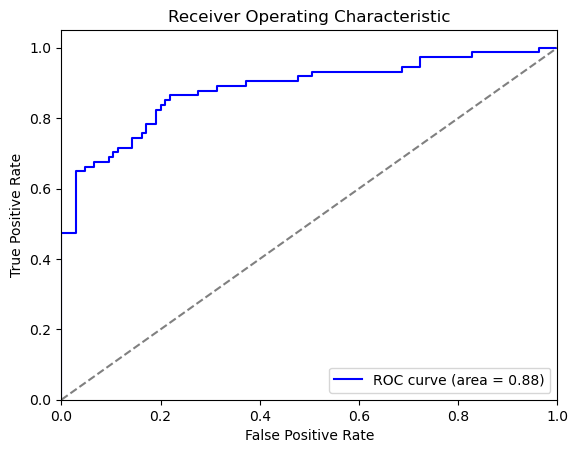

In [54]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()